In [60]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import classification_report
from scipy.stats import mode
# Loading the Iris dataset

In [61]:
data=pd.read_csv("Iris.csv")

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
X=data.copy()
X=X.drop(["Species"],axis=1)


In [64]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
y=data["Species"]

In [66]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
dbscan = DBSCAN(eps=0.9, min_samples=3)
dbscan.fit(X_train_scaled)

DBSCAN(eps=0.9, min_samples=3)

In [70]:
dbscan_train_labels = dbscan.labels_
dbscan_test_labels = dbscan.fit_predict(X_test_scaled)

In [79]:
from scipy.stats import mode
import numpy as np

# Function to map predicted clusters to true labels
def map_cluster_to_label(cluster_labels, true_labels):
    labels = np.zeros_like(cluster_labels)
    unique_clusters = np.unique(cluster_labels)

    for cluster in unique_clusters:
        mask = (cluster_labels == cluster)
        if np.any(mask):
            # Apply mode to true_labels[mask], which should be numeric
            most_frequent_label = mode(true_labels[mask], keepdims=True).mode[0]
            labels[mask] = most_frequent_label

    return labels


In [82]:

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_num = le.fit_transform(y_train)  # Converts to numeric labels
y_test_num = le.transform(y_test)

dbscan_train_mapped = map_cluster_to_label(dbscan_train_labels, y_train_num)
dbscan_test_mapped = map_cluster_to_label(dbscan_test_labels, y_test_num)

# Generate classification reports
print("DBSCAN Classification Report (Training):")
print(classification_report(y_train_num, dbscan_train_mapped))

print("DBSCAN Classification Report (Testing):")
print(classification_report(y_test_num, dbscan_test_mapped))


DBSCAN Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.53      1.00      0.69        41
           2       0.67      0.05      0.10        39

    accuracy                           0.68       120
   macro avg       0.73      0.68      0.59       120
weighted avg       0.73      0.68      0.60       120

DBSCAN Classification Report (Testing):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.00      0.00      0.00         9
           2       0.55      1.00      0.71        11

    accuracy                           0.70        30
   macro avg       0.52      0.67      0.57        30
weighted avg       0.54      0.70      0.59        30



C:\Users\utsav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\utsav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\utsav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [83]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_scaled)

KMeans(n_clusters=3, random_state=42)

In [85]:
kmeans_train_labels = kmeans.labels_
kmeans_test_labels = kmeans.predict(X_test_scaled)

In [86]:
def map_cluster_to_label(cluster_labels, true_labels):
    labels = np.zeros_like(cluster_labels)
    unique_clusters = np.unique(cluster_labels)
    
    for cluster in unique_clusters:
        mask = (cluster_labels == cluster)
        if np.any(mask):
            most_frequent_label = mode(true_labels[mask], keepdims=True).mode[0]
            labels[mask] = most_frequent_label
            
    return labels



In [87]:
# Mapping KMeans clusters to actual labels
kmeans_train_mapped = map_cluster_to_label(kmeans_train_labels, y_train_num)
kmeans_test_mapped = map_cluster_to_label(kmeans_test_labels, y_test_num)

# Classification report for KMeans
print("\nKMeans Classification Report (Training):")
print(classification_report(y_train_num, kmeans_train_mapped))

print("\nKMeans Classification Report (Testing):")
print(classification_report(y_test_num, kmeans_test_mapped))


KMeans Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.76      0.68      0.72        41
           2       0.70      0.79      0.75        39

    accuracy                           0.82       120
   macro avg       0.82      0.82      0.82       120
weighted avg       0.82      0.82      0.82       120


KMeans Classification Report (Testing):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



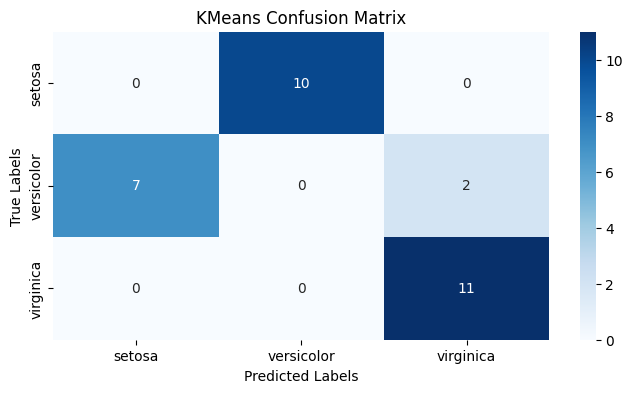

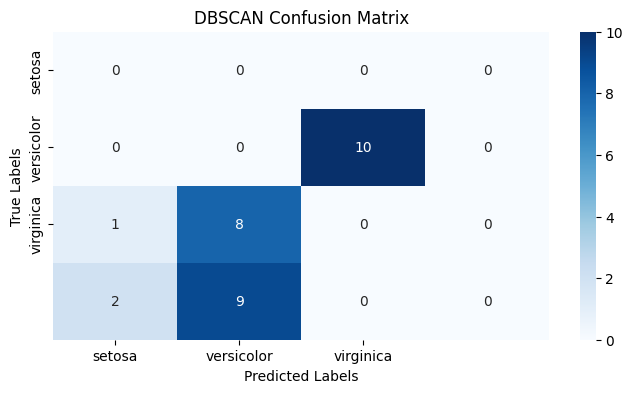

In [90]:
# KMeans Confusion Matrix
kmeans_conf_matrix = confusion_matrix(y_test, kmeans_test_labels)
plt.figure(figsize=(8, 4))
sns.heatmap(kmeans_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('KMeans Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# DBSCAN Confusion Matrix
dbscan_conf_matrix = confusion_matrix(y_test, dbscan_test_labels)
plt.figure(figsize=(8, 4))
sns.heatmap(dbscan_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('DBSCAN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()